哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [288]:
import pandas as pd 

In [289]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
land_a = pd.read_csv("A_lvr_land_A.csv")
land_b = pd.read_csv("B_lvr_land_A.csv")
land_e = pd.read_csv("E_lvr_land_A.csv")
land_f = pd.read_csv("F_lvr_land_A.csv")

E:\an\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [290]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
land_a = land_a.drop(0)
land_b = land_b.drop(0)
land_e = land_e.drop(0)
land_f = land_f.drop(0)

In [291]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
land_a["City"] = "Taipei"
land_b["City"] = "Taichung"
land_e["City"] = "Kaohsiung"
land_f["City"] = "New_Taipei"

In [292]:
#4. 將以上四份資料運用pd.concat()串接
land_total = pd.concat([land_a,land_b,land_e,land_f],axis = 0)

# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [293]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']

columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float','tx_dt':'int',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [294]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
land_total = land_total.rename(columns = columns_mapping)
land_total

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,City
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19814,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080817,土地2建物1車位1,十三層,...,坡道平面,30.31,1100000,預售屋、或土地及建物分次登記案件;,RPXNMLOJRHPFFIF57DA,73.39,2.65,8.52,有,New_Taipei
19815,三峽區,土地,成福段成福小段331~360地號,762,NaN,山坡地保育區,農牧用地,1090814,土地2建物0車位0,NaN,...,NaN,0,0,親友、員工、共有人或其他特殊關係間之交易;,RPQNMLRLQHPFFIF27DA,0.00,0.00,0.00,無,New_Taipei
19816,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080831,土地2建物1車位1,四層,...,坡道平面,30.31,1400000,預售屋、或土地及建物分次登記案件;,RPSPMLLLQHPFFIF07DA,73.40,2.64,8.52,有,New_Taipei
19817,鶯歌區,房地(土地+建物)+車位,中山路301~330號,19.85,其他,NaN,NaN,1090809,土地1建物1車位1,七層,...,坡道平面,24.14,0,NaN,RPUOMLRKQHPFFIF67DA,51.72,0.00,5.40,有,New_Taipei


In [295]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
land_total = land_total.loc[(land_total.main_use=='住家用')&(land_total.use_zoning=='住')]

In [296]:
land_total.dropna(axis='columns')

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,tx_dt,transaction_pen_number,shifting_level,building_state,main_use,...,compartmented_number,manages,total_price,berth_area_square_meter,berth_price,serial_number,main_building_area,auxiliary_building_area,balcony_area,City
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,1090406,土地1建物1車位2,四層,住宅大樓(11層含以上有電梯),住家用,...,有,有,36000000,40.7,0,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,1090317,土地1建物1車位0,三層,華廈(10層含以下有電梯),住家用,...,有,有,5580000,0.0,0,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,1090328,土地3建物1車位0,四層,華廈(10層含以下有電梯),住家用,...,有,無,18280000,0.0,0,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,Taipei
7,文山區,房地(土地+建物),臺北市文山區木柵路四段159巷170弄1~30號,30.65,住,1090417,土地2建物1車位0,五層,公寓(5樓含以下無電梯),住家用,...,有,無,8000000,0.0,0,RPQNMLQLNHPFFAA08CA,90.78,11.51,12.93,Taipei
8,文山區,房地(土地+建物),臺北市文山區興隆路三段112巷4弄1~30號,9.84,住,1090417,土地1建物1車位0,五層,公寓(5樓含以下無電梯),住家用,...,有,無,2200000,0.0,0,RPSPMLTJOHPFFAA68CA,26.15,0.00,4.01,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,三重區,房地(土地+建物),忠孝路三段15巷16弄1~30號,18.6,住,1090611,土地1建物1車位0,四層,公寓(5樓含以下無電梯),住家用,...,有,無,7280000,0.0,0,RPRPMLTJPHPFFGF27DA,75.34,0.00,9.19,New_Taipei
9543,三重區,房地(土地+建物),車路頭街62巷1~30號,32.0,住,1090521,土地1建物1車位0,二層，陽台,公寓(5樓含以下無電梯),住家用,...,有,無,7350000,0.0,0,RPOUMLSJPHPFFGF37DA,84.63,0.00,0.00,New_Taipei
10078,三重區,房地(土地+建物),新北市三重區平安街1~30號,23.34,住,1090522,土地1建物1車位0,四層,公寓(5樓含以下無電梯),住家用,...,有,無,6000000,0.0,0,RPPRMLSLPHPFFGF27CA,67.00,0.00,0.00,New_Taipei
10142,汐止區,房地(土地+建物),新北市汐止區大同路二段271~300號,9.74,住,1090507,土地1建物1車位0,四層,住宅大樓(11層含以上有電梯),住家用,...,有,有,11800000,0.0,0,RPUQMLOLPHPFFDF96CA,98.54,1.29,15.78,New_Taipei


In [297]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換

land_total = land_total.astype(columns_type)
land_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7818 entries, 1 to 11512
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   towns                       7818 non-null   object 
 1   transaction_sign            7818 non-null   object 
 2   house_number                7818 non-null   object 
 3   land_area_square_meter      7818 non-null   object 
 4   use_zoning                  7818 non-null   object 
 5   land_use_district           1 non-null      object 
 6   land_use                    0 non-null      object 
 7   tx_dt                       7818 non-null   int32  
 8   transaction_pen_number      7818 non-null   object 
 9   shifting_level              7818 non-null   object 
 10  total_floor_number          7812 non-null   object 
 11  building_state              7818 non-null   object 
 12  main_use                    7818 non-null   object 
 13  main_materials              7817

In [298]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引
year =  land_total['tx_dt'] > 1090101
year = year.replace([True,False],[109,108])
land_total['tx_dt_year'] = year


In [299]:
land_total = land_total.loc[(land_total.tx_dt_year==109) & (land_total.room_number <= 5) 
               & (land_total.room_number >= 1) & (land_total.hall_number <= 2)
               & (land_total.hall_number >= 1)]
land_total = land_total.reset_index(drop=True)

# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [300]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
land_total['building_area_square_feet'] = land_total['building_area_square_meter']*0.3025
land_total['main_building_area_square_feet'] = land_total['main_building_area']*0.3025
land_total['unit_price_square_feet'] = land_total['unit_price']/ 0.3025

In [301]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
land_total.describe()
# total_price 和 main_building_area 有 0

,tx_dt,building_area_square_meter,room_number,hall_number,health_number,total_price,unit_price,main_building_area,auxiliary_building_area,balcony_area,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.894000e+03,6894.000000,6894.000000,6894.000000,6894.000000,6.894000e+03,6894.000000,6894.000000,6894.000000,6894.000000,6894.0,6894.000000,6894.000000,6.894000e+03
mean,1.090463e+06,121.712089,2.850885,1.793299,1.733536,1.138712e+07,94364.671163,82.086667,4.879959,5.089267,109.0,36.817907,24.831217,3.119493e+05
std,8.593248e+01,62.871712,0.898498,0.404969,0.681085,1.159445e+07,58317.311227,37.363166,7.779029,6.066916,0.0,19.018693,11.302358,1.927845e+05
min,1.090102e+06,0.970000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,109.0,0.293425,0.000000,0.000000e+00
25%,1.090416e+06,82.965000,2.000000,2.000000,1.000000,5.580000e+06,53532.250000,60.682500,0.000000,0.000000,109.0,25.096912,18.356456,1.769661e+05
50%,1.090503e+06,109.390000,3.000000,2.000000,2.000000,8.550000e+06,79610.000000,78.990000,1.110000,2.860000,109.0,33.090475,23.894475,2.631736e+05
75%,1.090518e+06,147.517500,3.000000,2.000000,2.000000,1.329500e+07,118728.250000,95.797500,8.300000,9.450000,109.0,44.624044,28.978744,3.924901e+05
max,1.090802e+06,1444.950000,5.000000,2.000000,6.000000,2.250000e+08,610104.000000,335.760000,154.100000,48.130000,109.0,437.097375,101.567400,2.016873e+06


In [302]:
# 移除後再用.describe()觀察是否還有奇怪的資料?
land_total = land_total.loc[(land_total.total_price != 0) & (land_total.main_building_area != 0) ]
land_total.describe()


,tx_dt,building_area_square_meter,room_number,hall_number,health_number,total_price,unit_price,main_building_area,auxiliary_building_area,balcony_area,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.854000e+03,6854.000000,6854.000000,6854.000000,6854.000000,6.854000e+03,6854.000000,6854.000000,6854.000000,6854.000000,6854.0,6854.000000,6854.000000,6.854000e+03
mean,1.090463e+06,121.768404,2.849869,1.793114,1.733149,1.141669e+07,94548.453020,82.565725,4.908439,5.118968,109.0,36.834942,24.976132,3.125569e+05
std,8.591360e+01,62.849105,0.898343,0.405103,0.680869,1.161669e+07,58374.690321,36.940424,7.792733,6.072088,0.0,19.011854,11.174478,1.929742e+05
min,1.090102e+06,7.440000,1.000000,1.000000,0.000000,4.100000e+05,3239.000000,7.440000,0.000000,0.000000,109.0,2.250600,2.250600,1.070744e+04
25%,1.090416e+06,83.012500,2.000000,2.000000,1.000000,5.600000e+06,53597.250000,61.062500,0.000000,0.000000,109.0,25.111281,18.471406,1.771810e+05
50%,1.090503e+06,109.405000,3.000000,2.000000,2.000000,8.600000e+06,79742.500000,79.110000,1.180000,3.010000,109.0,33.095012,23.930775,2.636116e+05
75%,1.090517e+06,147.445000,3.000000,2.000000,2.000000,1.330000e+07,118880.000000,95.970000,8.357500,9.487500,109.0,44.602112,29.030925,3.929917e+05
max,1.090802e+06,1444.950000,5.000000,2.000000,6.000000,2.250000e+08,610104.000000,335.760000,154.100000,48.130000,109.0,437.097375,101.567400,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [303]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
land_total.loc[land_total.City == "Taipei"].corr()[['total_price','unit_price_square_feet']]

,total_price,unit_price_square_feet
tx_dt,0.008170,-0.025060
building_area_square_meter,0.864627,0.218185
room_number,0.326441,-0.100062
hall_number,0.270787,0.004883
health_number,0.598832,0.128217
total_price,1.000000,0.581290
unit_price,0.581290,1.000000
main_building_area,0.710515,0.112488
auxiliary_building_area,0.231765,0.079600
balcony_area,0.464666,0.015001


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

Taipei has the highest medium of unit_price_square_feet 


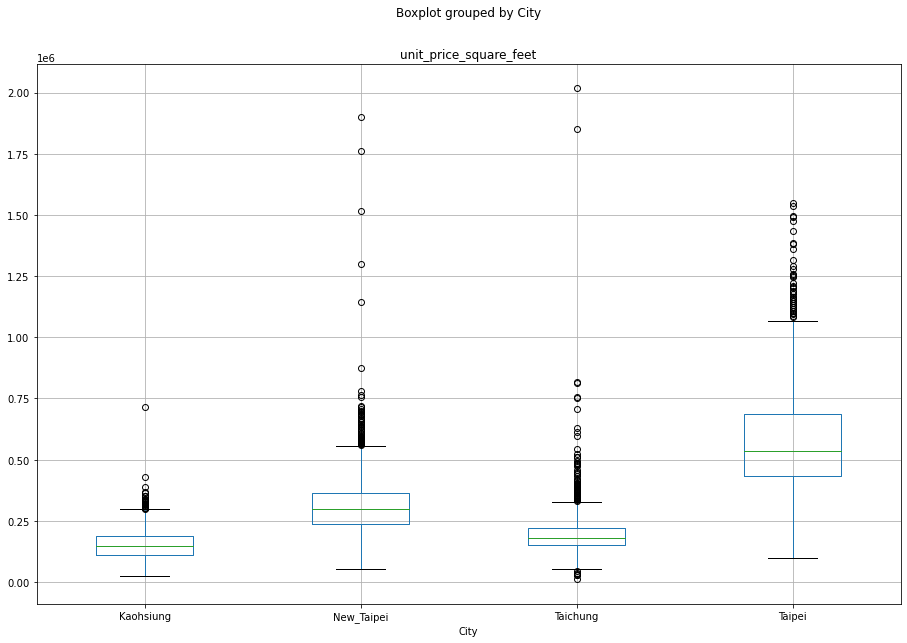

In [311]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
land_total.boxplot(column=['unit_price_square_feet'],by='City',figsize=(15,10))

print("Taipei has the highest medium of unit_price_square_feet ")

5 numbers room has the highest medium of total price


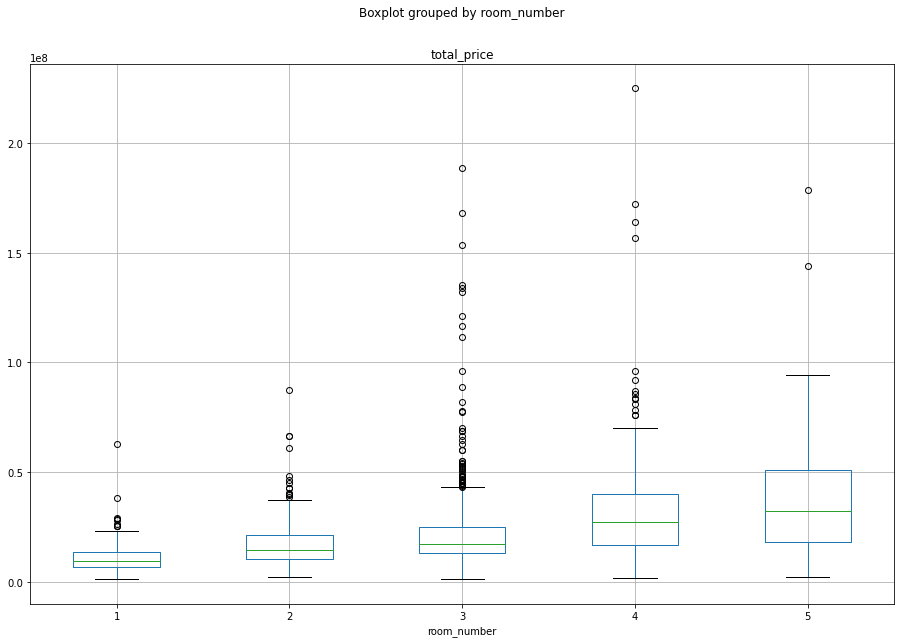

In [314]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
land_total.loc[land_total.City=='Taipei'].boxplot(column=['total_price'],by='room_number',figsize=(15,10))
print("5 numbers room has the highest medium of total price")

In [316]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，
#再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，
#並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(land_total['towns'].values)
land_total['towns_2'] = le.transform(land_total['towns'].values)

<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='towns_2'>

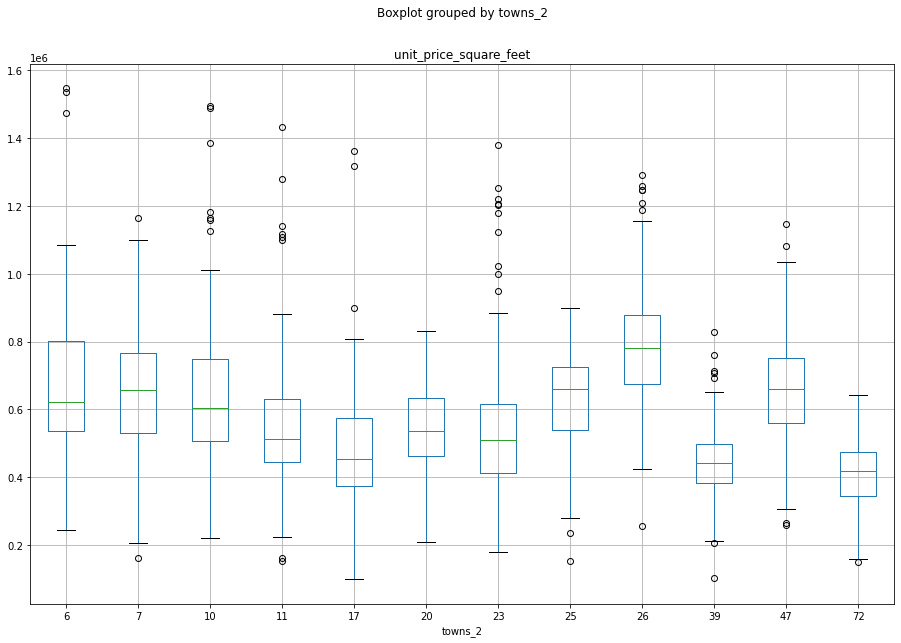

In [318]:
land_total.loc[land_total.City=='Taipei'].boxplot(column=['unit_price_square_feet'],by='towns_2',figsize=(15,10))
print("")